## Clustering

Given different objects and asked to put in groups, a child may group these objects over the colour, shape, hardness etc. These are variables of the objects which separate them.
As a natural process of segmentation, we look for similarities and dissimilarities within objects. This is called **clustering**, the method of identifying similar instances and keeping them together.

In other words, clustering identifies homogeneous subgroups among the observations.
As an unsupervised learning approach, clustering finds a structure/pattern in a collection of unlabeled data. Algorithms are capable of discovering hidden patterns which are often useful in areas such as Cybersecurity.

# KMeans Clustering

It is an unsupervised technique used to identify clusters of data objects in the dataset. K specifies the number of clusters.

Steps involved in K-Means Algorithm:

1. Initially choose the number of clusters as K.

2. Start with K centroids by putting them at random place (not necessarily from your dataset). **A centroid is a data point (imaginary or real) at the center of a cluster.**

3. Assign each point to the closest centroid. This forms k clusters.

4. Within each cluster, compute distance of every point from the centroid. Compute and place the new centroid for each cluster ie., calculate the mean value of points for each cluster and update the cluster centers.

5. You have k new centroids. Repeat the process again ie., reassign each data point to the new closest centroid. If any reassignment took place, go to step 4. But if there is no change ie., when clusters form a clear boundary, you have the final clusters for the given data.


### Use Case for Clustering: Group countries with similar construction permit trends, which can help understand regional or economic similarities.
**Index measuring the regulatory performance of obtaining Construction Permits**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("main_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 191 non-null    int64  
 1   country                                    191 non-null    object 
 2   fy2017, Dealing with construction permits  191 non-null    float64
 3   fy2019, Dealing with construction permits  191 non-null    float64
 4   fy2018, Dealing with construction permits  191 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.6+ KB


In [5]:
df.rename(columns={'fy2017, Dealing with construction permits':'fy2017','fy2019, Dealing with construction permits':'fy2018','fy2018, Dealing with construction permits':'fy2019'},inplace=True)

In [6]:
df

,Unnamed: 0,country,fy2017,fy2018,fy2019
0,0,AFG,33.70269,34.53602,34.53602
1,1,AGO,64.57157,65.32993,64.99177
2,2,ALB,52.60171,52.67715,52.64734
3,3,ARE,86.51006,89.75407,86.52729
4,4,ARG,48.96341,56.44015,49.26822
...,...,...,...,...,...
186,186,XKX,50.29844,55.28702,52.87432
187,187,YEM,0.00000,0.00000,0.00000
188,188,ZAF,68.26741,68.32331,68.24925
189,189,ZMB,71.10859,72.09460,71.72488


### Domain Analysis

1. Country :- These are country names where the respective construction permits are happening in different years.

2. fy2017, Dealing with construction permits :- Construction permits in Financial year 2017

3. fy2018, Dealing with construction permits :- Construction permits in Financial year 2018

4. fy2019, Dealing with construction permits :- Construction permits in Financial year 2019

### Basic Checks

In [7]:
df.isnull().sum()

Unnamed: 0    0
country       0
fy2017        0
fy2018        0
fy2019        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Unnamed: 0', 'country', 'fy2017', 'fy2018', 'fy2019'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  191 non-null    int64  
 1   country     191 non-null    object 
 2   fy2017      191 non-null    float64
 3   fy2018      191 non-null    float64
 4   fy2019      191 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.6+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,191.0,95.000000,55.281100,0.0,47.500000,95.00000,142.500000,190.00000
fy2017,191.0,63.269214,16.622900,0.0,56.300935,66.69420,73.407800,91.21002
fy2018,191.0,65.845667,15.815424,0.0,59.640150,68.68324,75.182955,93.46702
fy2019,191.0,64.770344,15.707923,0.0,57.710025,67.94367,73.913715,91.24105


df.head()

In [12]:
df.head()

,Unnamed: 0,country,fy2017,fy2018,fy2019
0,0,AFG,33.70269,34.53602,34.53602
1,1,AGO,64.57157,65.32993,64.99177
2,2,ALB,52.60171,52.67715,52.64734
3,3,ARE,86.51006,89.75407,86.52729
4,4,ARG,48.96341,56.44015,49.26822


### EDA

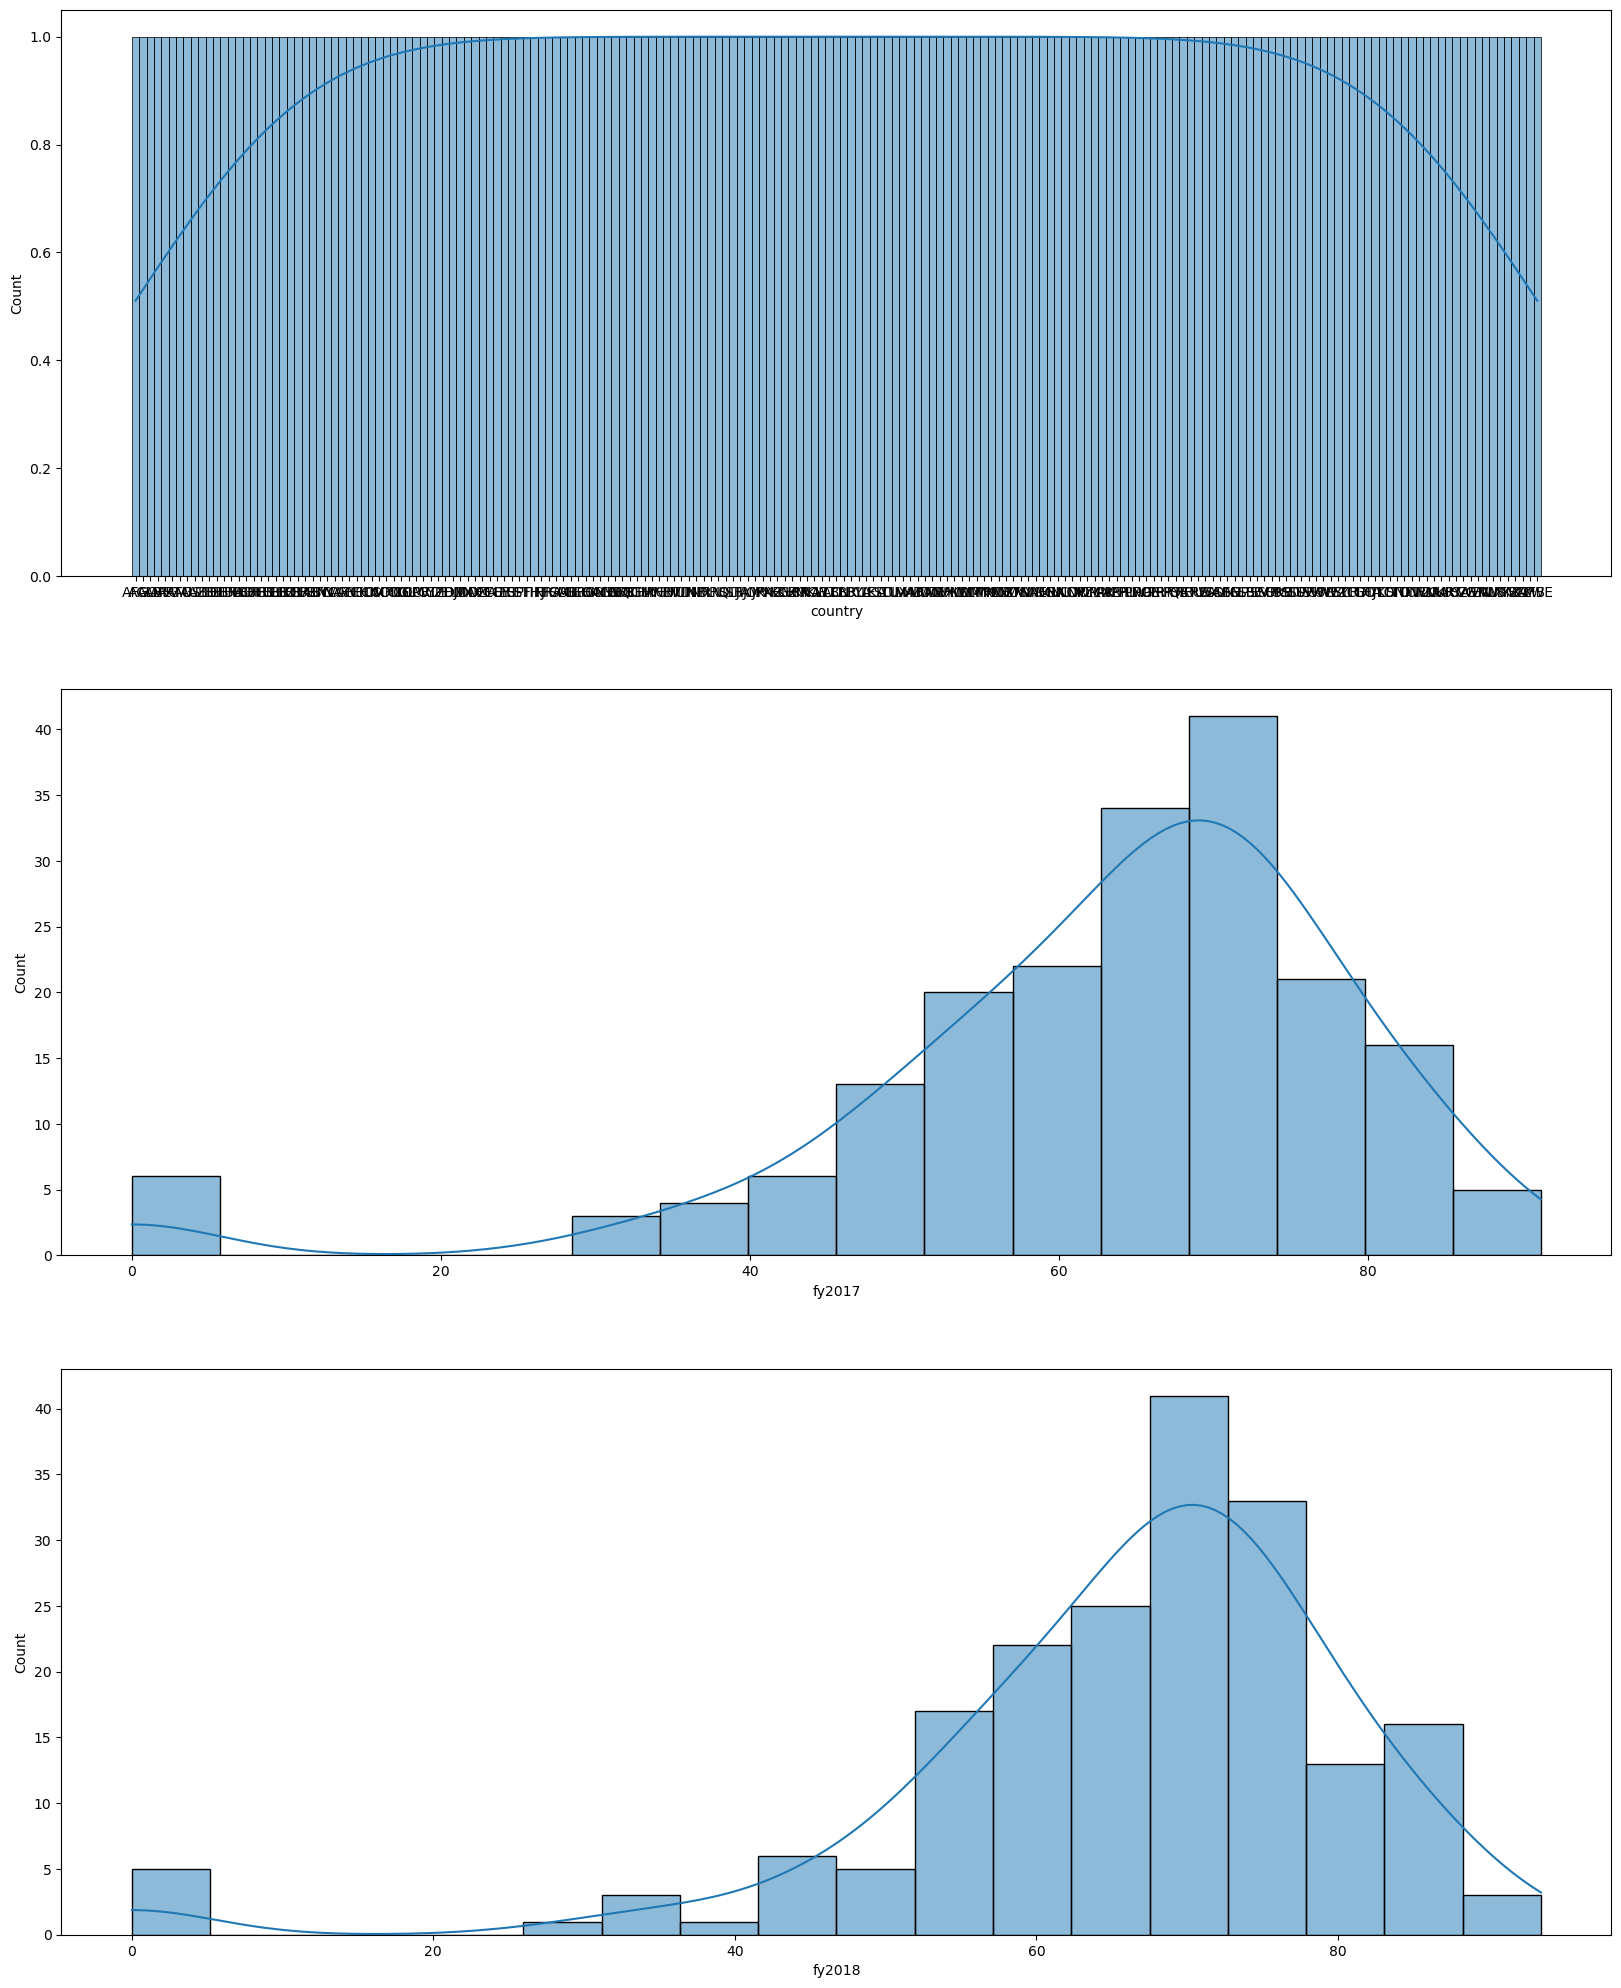

In [13]:
# Univariate Analysis
figure=plt.figure(figsize=(20,25))
for i in range(1,4):
    plt.subplot(3,1,i)
    sns.histplot(df.iloc[:,i],kde=True)

### Handling Outliers.

In [14]:
# First column
q1 = df['fy2017'].quantile(0.25)
q3 = df['fy2017'].quantile(0.75)
print(q1)
print(q3)

56.300934999999996
73.40780000000001


In [15]:
IQR = q3-q1
print(IQR)

17.106865000000013


In [16]:
min_=q1-1.5*IQR
print(min_)

30.640637499999976


In [17]:
max_ = q3+1.5*IQR
print(max_)

99.06809750000002


In [18]:
df.loc[df['fy2017']>max_]

,Unnamed: 0,country,fy2017,fy2018,fy2019


In [19]:
df.loc[df['fy2017']<min_]

,Unnamed: 0,country,fy2017,fy2018,fy2019
50,50,ERI,0.00000,0.00000,0.00000
96,96,LBR,28.93852,28.93852,28.93852
97,97,LBY,0.00000,0.00000,0.00000
99,99,LIE,0.00000,83.51370,83.52035
154,154,SOM,0.00000,0.00000,0.00000
164,164,SYR,0.00000,0.00000,0.00000
187,187,YEM,0.00000,0.00000,0.00000


In [20]:
len(df.loc[df['fy2017']<min_])/len(df)*100

3.664921465968586

In [21]:
df['fy2017'].median()

66.6942

In [22]:
df.loc[df['fy2017']<min_,'fy2017']=df['fy2017'].median()

In [23]:
df.loc[df['fy2017']<min_]

,Unnamed: 0,country,fy2017,fy2018,fy2019


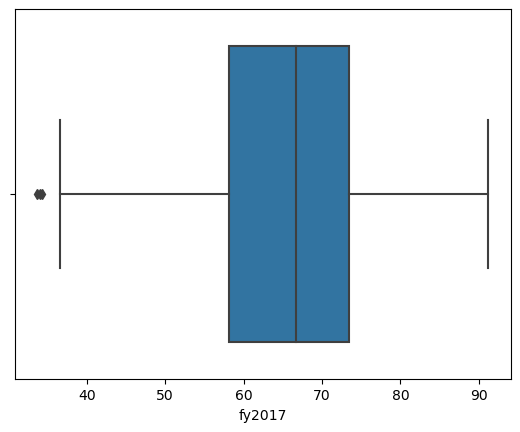

In [24]:
sns.boxplot(x='fy2017',data=df)
plt.show()

In [25]:
# Second Column
q1 = df['fy2019'].quantile(0.25)
q3 = df['fy2019'].quantile(0.75)
print(q1)
print(q3)

57.710025
73.913715


In [26]:
IQR = q3-q1
print(IQR)

16.203689999999995


In [27]:
min_ = q1-1.5*IQR
max_ = q3+1.5*IQR
print(min_)
print(max_)

33.40449000000001
98.21924999999999


In [28]:
df.loc[df['fy2019']>max_]

,Unnamed: 0,country,fy2017,fy2018,fy2019


In [29]:
df.loc[df['fy2019']<min_]

,Unnamed: 0,country,fy2017,fy2018,fy2019
50,50,ERI,66.6942,0.00000,0.00000
96,96,LBR,66.6942,28.93852,28.93852
97,97,LBY,66.6942,0.00000,0.00000
154,154,SOM,66.6942,0.00000,0.00000
164,164,SYR,66.6942,0.00000,0.00000
187,187,YEM,66.6942,0.00000,0.00000


In [30]:
len(df.loc[df['fy2019']<min_])/len(df) * 100

3.1413612565445024

In [31]:
df.loc[df['fy2019']<min_,'fy2019']=df['fy2019'].median()

In [32]:
df.loc[df['fy2019']<min_]

,Unnamed: 0,country,fy2017,fy2018,fy2019


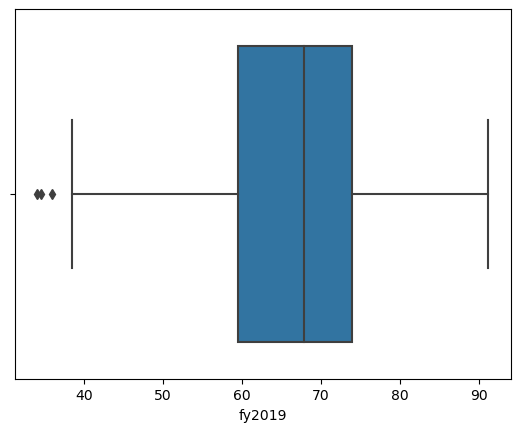

In [33]:
sns.boxplot(x='fy2019',data=df)
plt.show()

In [34]:
q1 = df['fy2018'].quantile(0.25)
q3 = df['fy2018'].quantile(0.75)
print(q1)
print(q3)

59.640150000000006
75.18295499999999


In [35]:
IQR = q3 - q1
print('IQR:',IQR)

IQR: 15.542804999999987


In [36]:
min_=q1-1.5*IQR
max_=q3+1.5*IQR

In [37]:
print(min_)
print(max_)

36.325942500000025
98.49716249999997


In [38]:
df.loc[df['fy2018']<min_]

,Unnamed: 0,country,fy2017,fy2018,fy2019
0,0,AFG,33.70269,34.53602,34.53602
27,27,CAF,34.09510,34.09510,34.09510
50,50,ERI,66.69420,0.00000,67.94367
96,96,LBR,66.69420,28.93852,67.94367
97,97,LBY,66.69420,0.00000,67.94367
107,107,MDG,34.22959,35.89625,35.89625
154,154,SOM,66.69420,0.00000,67.94367
164,164,SYR,66.69420,0.00000,67.94367
187,187,YEM,66.69420,0.00000,67.94367


In [39]:
df.loc[df['fy2018']>max_]

,Unnamed: 0,country,fy2017,fy2018,fy2019


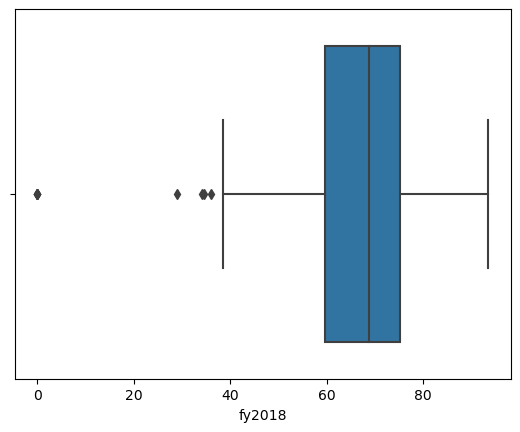

In [40]:
sns.boxplot(x='fy2018',data=df)
plt.show()

In [41]:
df.loc[df['fy2018']<min_,'fy2018']=df.fy2018.median()

In [42]:
df.loc[df['fy2018']<min_]

,Unnamed: 0,country,fy2017,fy2018,fy2019


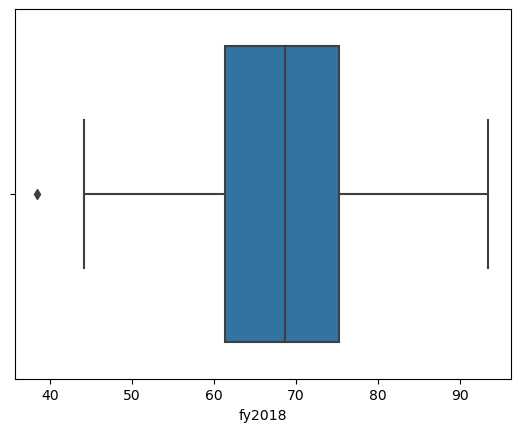

In [43]:
sns.boxplot(x='fy2018',data=df)
plt.show()

In [44]:
df.head()

,Unnamed: 0,country,fy2017,fy2018,fy2019
0,0,AFG,33.70269,68.68324,34.53602
1,1,AGO,64.57157,65.32993,64.99177
2,2,ALB,52.60171,52.67715,52.64734
3,3,ARE,86.51006,89.75407,86.52729
4,4,ARG,48.96341,56.44015,49.26822


In [45]:
df.drop(columns='Unnamed: 0',inplace=True)

#### Numerical data for Clustering

In [46]:
# Set colours to the clusters to differntiate(not required in main implementation)
color_scheme = np.array(['red','blue','green','blue','cyan'])

In [47]:
X=df.iloc[:,1:]
X.head()

,fy2017,fy2018,fy2019
0,33.70269,68.68324,34.53602
1,64.57157,65.32993,64.99177
2,52.60171,52.67715,52.64734
3,86.51006,89.75407,86.52729
4,48.96341,56.44015,49.26822


## Elbow Technique

Elbow method is the most popular method that is used to determine the optimal value of k.

**How it works?**

- Start with some K.
- Calculate WCSS (Within Cluster Sum of squared errors) ie., for each of the cluster, it calculate the distance of individual data points from the centroid, then square it and sum it up.
             WCSS = WCSS1 + WCSS2 + ..... WCSSk
             
- Take new value for K, repeat step2.
- For each number of K, WCSS is calculated.
- Find the elbow point. That is the optimal value of K.

 As the number of K increases, the error reduces.



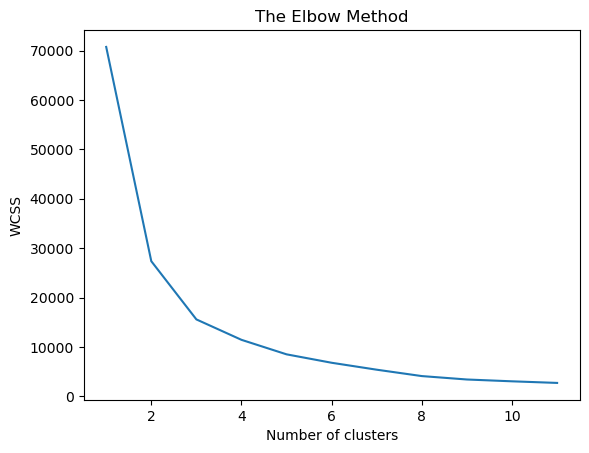

In [48]:
# Elbow Method
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range (1,12):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #In k-means clustering, inertia measures how well the clusters are formed. 
                                 #It is the sum of squared distances of each point to the nearest cluster center.
plt.plot(range(1,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie., the point after which the distortion/inertia start decreasing in a linear fashion.

## Model Building

In [49]:
# Initialise the model with K as 3
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42)

#Training the model
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [50]:
label=model.labels_
label

array([0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2,
       0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 0,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2,
       2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 1, 0,
       2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0])

In [51]:
from collections import Counter
Counter(label)

Counter({0: 45, 2: 87, 1: 59})

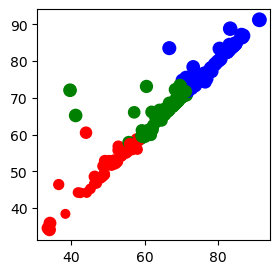

In [52]:
# Visualize the clusters formed by the model 
plt.figure(figsize=(3,3))
plt.scatter(X.fy2017,X.fy2019,X.fy2018,color=color_scheme[model.labels_]);

In [53]:
new_point=[[15,40,100]] # A new observation
model.predict(new_point) # predicted label

array([0])

### Interpretation of the Cluster Labels

In [54]:
df['Labels']=label
df

,country,fy2017,fy2018,fy2019,Labels
0,AFG,33.70269,68.68324,34.53602,0
1,AGO,64.57157,65.32993,64.99177,2
2,ALB,52.60171,52.67715,52.64734,0
3,ARE,86.51006,89.75407,86.52729,1
4,ARG,48.96341,56.44015,49.26822,0
...,...,...,...,...,...
186,XKX,50.29844,55.28702,52.87432,0
187,YEM,66.69420,68.68324,67.94367,2
188,ZAF,68.26741,68.32331,68.24925,2
189,ZMB,71.10859,72.09460,71.72488,2


### Label 0

In [55]:
(df.loc[df['Labels']==0].iloc[:,3].mean(),
 df.loc[df['Labels']==0].iloc[:,1].mean(),
 df.loc[df['Labels']==0].iloc[:,2].mean())

(51.17642622222222, 49.75739133333333, 54.86742822222222)

### Label 1

In [56]:
(df.loc[df['Labels']==1].iloc[:,3].mean(),
 df.loc[df['Labels']==1].iloc[:,1].mean(),
 df.loc[df['Labels']==1].iloc[:,2].mean())

(78.72175254237288, 77.97636796610169, 79.45865762711863)

### Label 2

In [57]:
(df.loc[df['Labels']==2].iloc[:,3].mean(),df.loc[df['Labels']==2].iloc[:,1].mean(),df.loc[df['Labels']==2].iloc[:,2].mean())

(66.69352413793102, 65.31784367816093, 67.86333919540229)

From the above means of performance indices, we can see that the model clustered countries according to ease of dealing with construction permits:
- Label 1: Countries with least performance
- Label 0: Countries with the highest performance
- Label 2: Countries with reasonably good performance

In [66]:
df0=pd.read_csv("main_data.csv") # original with country codes
df['country']=df0['country']
df.head()

,country,fy2017,fy2018,fy2019,Labels
0,AFG,33.70269,68.68324,34.53602,0
1,AGO,64.57157,65.32993,64.99177,2
2,ALB,52.60171,52.67715,52.64734,0
3,ARE,86.51006,89.75407,86.52729,1
4,ARG,48.96341,56.44015,49.26822,0


#### Grouping Countries based on Performance Measures

In [67]:
label

array([0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2,
       0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 0,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2,
       2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 1, 0,
       2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0])

In [68]:
least=[]
moderate=[]
highest=[]

for i in range(len(df)):
    if label[i]==0:
        highest.append(df['country'][i])
    elif label[i]==1:
        least.append(df['country'][i])
    else:
        moderate.append(df['country'][i])

In [61]:
print("Countries with least regulatory performance: \n",least)

Countries with least regulatory performance: 
 ['ARE', 'AUS', 'AUT', 'BEL', 'BGR', 'BHR', 'BLR', 'BRN', 'BWA', 'CAN', 'CHL', 'CPV', 'DEU', 'DNK', 'EST', 'FIN', 'FRA', 'GBR', 'GEO', 'HKG', 'IRL', 'ISR', 'JPN', 'KAZ', 'KNA', 'KOR', 'LCA', 'LIE', 'LTU', 'LUX', 'LVA', 'MAR', 'MDV', 'MKD', 'MLT', 'MNE', 'MNG', 'MOZ', 'MUS', 'MYS', 'NOR', 'NZL', 'OMN', 'POL', 'PRT', 'QAT', 'RUS', 'SAU', 'SGP', 'SRB', 'SWE', 'THA', 'TON', 'TUN', 'TWN', 'UKR', 'USA', 'VCT', 'VNM']


In [62]:
print("Countries with reasonable regulatory performance: \n",moderate)

Countries with reasonable regulatory performance: 
 ['AGO', 'ARM', 'ATG', 'AZE', 'BEN', 'BFA', 'BGD', 'BHS', 'BLZ', 'BOL', 'BTN', 'CHE', 'CHN', 'COG', 'COL', 'COM', 'CRI', 'CYP', 'DJI', 'DMA', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'FJI', 'FSM', 'GHA', 'GIN', 'GRC', 'GRD', 'GTM', 'HUN', 'IDN', 'IND', 'IRN', 'IRQ', 'ISL', 'ITA', 'JAM', 'JOR', 'KEN', 'KGZ', 'KWT', 'LAO', 'LBR', 'LBY', 'LKA', 'MEX', 'MHL', 'MLI', 'MMR', 'MRT', 'MWI', 'NAM', 'NGA', 'NLD', 'NPL', 'PAN', 'PER', 'PHL', 'PLW', 'PNG', 'PRI', 'PRY', 'RWA', 'SDN', 'SEN', 'SMR', 'SOM', 'STP', 'SUR', 'SVK', 'SVN', 'SWZ', 'SYC', 'SYR', 'TJK', 'TTO', 'TUR', 'UGA', 'UZB', 'WSM', 'YEM', 'ZAF', 'ZMB']


In [63]:
print("Countries with highest regulatory performance: \n",highest)

Countries with highest regulatory performance: 
 ['AFG', 'ALB', 'ARG', 'BDI', 'BIH', 'BRA', 'BRB', 'CAF', 'CIV', 'CMR', 'COD', 'CZE', 'ETH', 'GAB', 'GMB', 'GNB', 'GNQ', 'GUY', 'HND', 'HRV', 'HTI', 'KHM', 'KIR', 'LBN', 'LSO', 'MDA', 'MDG', 'NER', 'NIC', 'PAK', 'PSE', 'ROU', 'SLB', 'SLE', 'SLV', 'SSD', 'TCD', 'TGO', 'TLS', 'TZA', 'URY', 'VEN', 'VUT', 'XKX', 'ZWE']


### Evaluation

In [69]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,label)
score

0.48995430249194794

Try modeling with different k values to compare the clustering efficiency.

The range of Silhouette score is [-1, 1]. Its analysis is as follows −

+1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

-1 Score − 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.

The calculation of Silhouette score can be done by using the following formula

$$silhouette score\:=\:(p-q)/max(p,q)$$

Here, p = mean distance to the points in the nearest cluster

And, q = mean intra-cluster distance to all the points.

### Applications
The scikit-learn book describes the various applications of clustering as follows:

* __For customer segmentation:__ You can cluster your customers based on their purchases,their activity on your website, and so on. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, this can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.Subdivision of customers into groups/segments such that each customer segment consists of customers with similar market characteristics — pricing , loyalty, spending behaviors etc. Some of the segmentation variables could be e.g., number of items bought on sale, avg transaction value, total number of transactions. Customer segmentation allows businesses to customize market programs that will be suitable for each of its customer segments

* __For data analysis:__ When analyzing a new dataset, it is often useful to first discover clusters of similar instances, as it is often easier to analyze clusters separately.

* __Inventory Categorization based on sales or other manufacturing metrics.

* __For anomaly detection (also called outlier detection):__ Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second, and so on. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.


* __For search engines:__ For example, some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database: similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is to find this image’s cluster using the trained clustering model, and you can then simply return all the images from this cluster.

* __To segment an image:__ By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to reduce the number of different colors in the image considerably. This technique is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.


##### Approaches for Clustering:
The clustering approaches can be broadly divided into two categories: _Agglomerative_ and _Divisive_.

**Agglomerative:** This approach first considers all the points as individual clusters and then finds out the similarity between two points, puts them into a cluster. Then it goes on finding similar points and clusters until there is only one cluster left i.e., all points belong to a big cluster. This is also called the bottom-up approach.

**Divisive:** It is opposite of the agglomerative approach. It first considers all the points to be part of one big cluster and in the subsequent steps tries to find out the points/ clusters which are least similar to each other and then breaks the bigger cluster into smaller ones. This continues until there are as many clusters as there are datapoints. This is also called the top-down approach.

### Assumption of K Means:
- Clusters are spatially grouped or spherical
- All features are scaled
- Clusters are of similar size

### Pros:
- Works well even when some assumptions are broken
- Simple and easy to implement
- Easy to interpret

### Cons:

- Sensitive to outliers
- k value has to be known before

### Goal of Clustering

- Distance between centroid and its point should be minimum
- Intra-cluster distance should be less
- Distance between intercluster should be high